# Week 46

In [1]:
try:
    import fysisk_biokemi
    print("Already installed")
except ImportError:
    %pip install -q "fysisk_biokemi[colab] @ git+https://github.com/au-mbg/fysisk-biokemi.git"

------------------------------------------------------------------------

## Python: Introduction to curve fitting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Curve fitting is a fundamental skill in biochemistry and biophysics for
analyzing experimental data. We use curve fitting to determine
parameters in mathematical models that describe biological processes
like enzyme kinetics, binding affinity, and reaction rates.

The basic idea is to find the parameters of a mathematical function that
best describes our experimental data.

#### (a) Understanding the problem

Let’s start with some simple data that follows a linear relationship.
The data below represents a theoretical experiment where we measure some
output $y$ at different input values $x$:

In [3]:
# Generate some data with noise
x_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_data = np.array([2.1, 4.2, 6.0, 7.8, 10.1, 12.2, 13.9, 16.1, 18.0, 20.2])

Text(0.5, 1.0, 'Experimental data points')

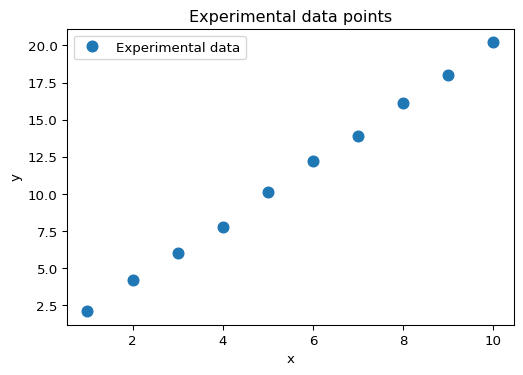

In [5]:
# Plot the data
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x_data, y_data, 'o', markersize=8, label='Experimental data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.set_title('Experimental data points')

Looking at this data, we can see it roughly follows a straight line.
Let’s assume our model is:

$$y = ax + b$$

where $a$ and $b$ are parameters we want to determine from the data.

#### (b) Defining a fitting function

To use `scipy.optimize.curve_fit`, we need to define a function where:

-   The **first** argument is the independent variable (x)  
-   The remaining arguments are the parameters to be fitted

Define a linear function for fitting:

In [7]:
def linear_function(x, a, b):
    return a * x + b

Always a good idea to check that your function works as expected

In [8]:
linear_function(1, 2, 0) # Should give 2

2

Come up with another test case to check

In [10]:
print(linear_function(0, 2, 3)) # Should give 3 
print(linear_function(1, 2, 3)) # Should give 5

3
5

#### (c) Your first curve fit

Now we can use `curve_fit` to find the best parameters. The basic syntax
is:

``` python
popt, pcov = curve_fit(function, x_data, y_data, p0=initial_guess)
```

Where:

-   `function`: The function we defined above
-   `x_data`, `y_data`: Our experimental data
-   `p0`: Initial guess for parameters (optional but recommended)
-   `popt`: The optimized parameters (what we want!)
-   `pcov`: Covariance matrix (contains information about parameter
    uncertainties, which you don’t need to worry about at the moment.)

Finish the cell below to perform the curve fit by adding the three
missing arguments to the call to `curve_fit`.

In [12]:
# Initial guess: a=2, b=0
p0 = [2, 0]

# Perform the fit
popt, pcov = curve_fit(linear_function, x_data, y_data, p0=p0)

# Extract parameters
a_fit, b_fit = popt
print(f"Fitted parameters: a = {a_fit:.3f}, b = {b_fit:.3f}")

Fitted parameters: a = 2.002, b = 0.047

#### (d) Visualizing the fit

It’s crucial to always plot your fit to see how well it describes the
data. To do this we evaluate the function with the fitted parameters and
a densely sampled independent variable.

In [14]:
x_smooth = np.linspace(0, 11, 100)
y_fit = linear_function(x_smooth, a_fit, b_fit)

Then we can plot it

Text(0.5, 1.0, 'Fit')

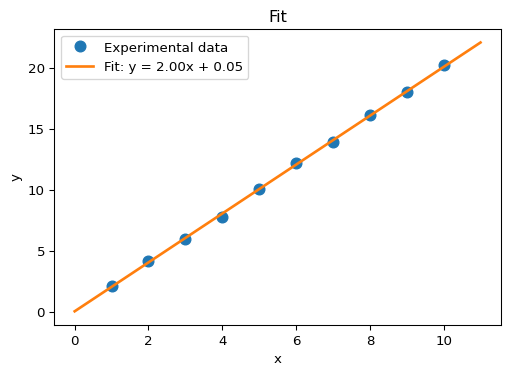

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x_data, y_data, 'o', markersize=8, label='Experimental data')
ax.plot(x_smooth, y_fit, '-', linewidth=2, label=f'Fit: y = {a_fit:.2f}x + {b_fit:.2f}')
ax.set_xlabel('x')
ax.set_ylabel('y') 
ax.legend()
ax.set_title('Fit')

#### (e) Nonlinear fitting: Exponential decay

Many biological processes follow nonlinear relationships. Let’s work
with exponential decay, which is common in biochemistry (e.g.,
radioactive decay or unimolecular chemical reactions).

First, let’s generate some exponential data:

Text(0.5, 1.0, 'Exponential decay data')

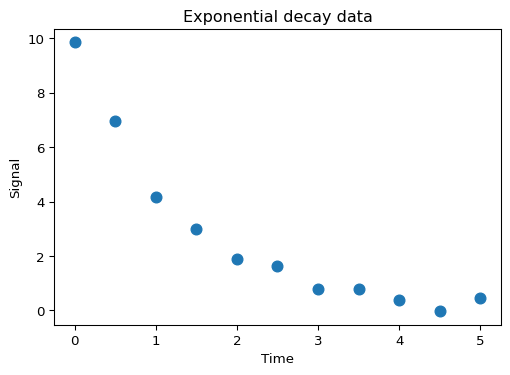

In [18]:
# Generate exponential decay data
t = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
# True parameters: A=10, k=0.8
A_true, k_true = 10, 0.8
signal = A_true * np.exp(-k_true * t) + np.random.normal(0, 0.3, len(t))

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(t, signal, 'o', markersize=8)
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.set_title('Exponential decay data')

The model we want to fit is: $$\text{signal} = A e^{-kt}$$

Define the exponential decay function:

In [20]:
def exponential_decay(t, A, k):
    return A * np.exp(-k * t)

Now fit the exponential function to the data:

In [22]:
# Initial guess: A=8, k=1
p0 = [8, 1]

# Perform the fit
popt, pcov = curve_fit(exponential_decay, t, signal, p0=p0)

# Extract parameters
A_fit, k_fit = popt
print(f"Fitted parameters: A = {A_fit:.3f}, k = {k_fit:.3f}")
print(f"True parameters:   A = {A_true:.3f}, k = {k_true:.3f}")

Fitted parameters: A = 9.921, k = 0.797
True parameters:   A = 10.000, k = 0.800

Again we should plot to check that it looks as expected

In [24]:
t_smooth = np.linspace(0, 5, 100)
signal_fit = exponential_decay(t_smooth, A_fit, k_fit)

In [25]:
fig, ax = plt.subplots(figsize=(6, 4))

# Plot
ax.plot(..., ..., 'o', markersize=8, label='Experimental data') # Plot the data
ax.plot(..., ..., '-', linewidth=2, label=f'Fit: A={A_fit:.2f}, k={k_fit:.2f}') # Plot the fit

# Customization:
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.legend()
ax.set_title('Exponential decay curve fit')

Text(0.5, 1.0, 'Exponential decay curve fit')

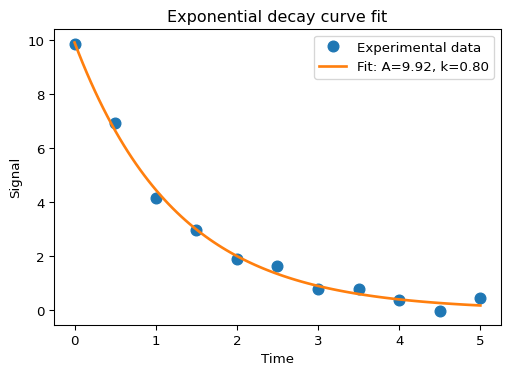

In [26]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(t, signal, 'o', markersize=8, label='Experimental data')
ax.plot(t_smooth, signal_fit, '-', linewidth=2, label=f'Fit: A={A_fit:.2f}, k={k_fit:.2f}')
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.legend()
ax.set_title('Exponential decay curve fit')

------------------------------------------------------------------------

> **Key points for successful curve fitting:**
>
> 1.  **Always plot your data first** to understand what kind of
>     function might fit
> 2.  **Provide good initial guesses** (`p0`) - poor guesses can lead to
>     fitting failure
> 3.  **Use parameter bounds** when you know physical constraints
> 4.  **Always plot the fit** to visually check if it makes sense
> 5.  **Check if parameters are reasonable** based on your biochemical
>     knowledge

> **Common pitfalls:**
>
> -   **Overfitting**: Using too many parameters for the amount of data
>     you have
> -   **Poor initial guesses**: Can cause the fit to fail or find a
>     local minimum
> -   **Ignoring physical constraints**: Fitted parameters should make
>     biological sense
> -   **Not checking the fit visually**: Always plot to see if the fit
>     is reasonable

> **Summary of `curve_fit`**
>
> Fitting refers to finding the parameters that make an assumed
> functional form best ‘fit’ the data. Programmatically we will use the
> `curve_fit` from the `scipy` package to do so. The signature of this
> function looks like this
>
> ``` python
> curve_fit(function, 
>             x_data, 
>             y_data, 
>             p0=[param_1, param_2, ...])
> ```
>
> The arguments are
>
> -   `function`: A python function where the **first** argument is the
>     independent variable, and other arguments are the parameters of
>     the functions.
> -   `x_data`: The observed values of the independent variable.
> -   `y_data`: The observed values of the dependent variable.
> -   `p0`: Initial guesses for the parameters.
>
> When called `curve_fit` starts by calculating how well the functions
> fits the data with the initial parameters in `p0` and then iteratively
> improves the fit by trying new values for the parameters in an
> intelligent way.
>
> The found parameters will generally depend on `p0` and it is therefore
> necessary to provide a good (or good enough) guess for `p0`.
>
> Generally, the best way to learn more about a function is to read it’s
> documentation and then play around with it. The documentation is in
> this case on the [SciPy
> website](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).
> You don’t need to read it, unless you want more details.

You now have the fundamental skills needed to fit curves to biochemical
data! In the exercises, you’ll apply these techniques to analyze real
experimental data and extract meaningful biological parameters.

------------------------------------------------------------------------

## Estimation of binding affinity

#### (a) Train estimation skills

Train your estimation skills using the widget below.

In [27]:
from fysisk_biokemi.widgets.utils.colab import enable_custom_widget_colab
from fysisk_biokemi.widgets import estimate_kd

enable_custom_widget_colab()
estimate_kd()

#### (b) Compare to quadratic

The widget below shows the curves for $\theta$ using both the simple
expression assuming that $L = L_{tot}$ and the quadratic binding
expression. Vary $K_D$ and $P_{total}$ to work out a rule of thumb for
when the two equations give a similar curve.

In [28]:
from fysisk_biokemi.widgets.utils.colab import enable_custom_widget_colab
from fysisk_biokemi.widgets import visualize_simple_vs_quadratic

enable_custom_widget_colab()
visualize_simple_vs_quadratic()

In [29]:
answer = "They are equal when P_tot << K_D"

------------------------------------------------------------------------

## Dialysis experiment

In [30]:
import numpy as np

A dialysis experiment was set up where equal amounts of a protein were
separately dialyzing against buffers containing different concentrations
of a ligand – each measurement was done in triplicate. The average
number of ligands bound per protein molecule, $\bar{n}$ were obtained
from these experiments. The corresponding concentrations of free ligand
and values are given in dataset `dialys-exper.xlsx`.

#### (a) Load the dataset

In [31]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [32]:
df = uploader.get_dataframe()
display(df)

In [33]:
from IPython.display import display 
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('dialysis_experiment') # Load from package for the solution so it doesn't require to interact.
display(df)

#### (b) Explain calculation of $\bar{n}$

Explain how the values of $\bar{n}$ is calculated when knowing the
concentrations of ligand inside and outside the dialysis bag, as well as
the total concentration of the protein, \[$\text{P}_{\text{tot}}$\].

#### (c) Molar concentrations

Convert the concentrations of free ligand to SI-units given in M, add it
as a row to the `DataFrame`.

In [34]:
df['Free_ligand_(M)'] = df['Free_ligand_(uM)'] * 10**(-6)
display(df)

#### (c) Plot the data

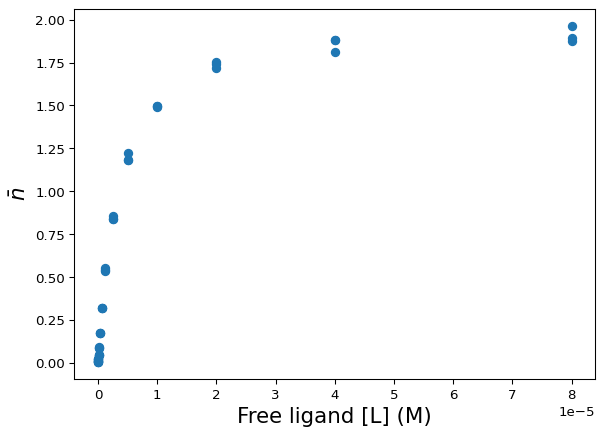

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df['Free_ligand_(M)'], df['n_bar'], 'o')
ax.set_xlabel('Free ligand [L] (M)', fontsize=16)
ax.set_ylabel(r'$\bar{n}$', fontsize=16)
plt.show()

#### (d) Prepare for fitting

Now we want to fit the data to extract $K_D$ and $n$, by using the
equation

$$
\bar{n}([L_{\text{free}}]) = n \frac{[L_{\text{free}}]}{K_D + [L_{\text{free}}]}
$$

To do so we need to implmenet it as a Python function

In [38]:
def nbar(L, n, K_D):
    return n * L / (K_D + L)

print(f"{nbar(1, 1, 1) = }") # Should give 1/2
print(f"{nbar(21, 47, 2.5) = }") # Should give 42

nbar(1, 1, 1) = 0.5
nbar(21, 47, 2.5) = 42.0

#### (e) Actually fitting

Finish the code to perform the fitting in the cell below.

In [40]:
from scipy.optimize import curve_fit

# Choose the variables from the dataframe
x = df['Free_ligand_(M)']
y = df['n_bar']

# Initial guess
K_D_guess = 10**(-5)
n_guess = 1
p0 = [K_D_guess, n_guess]

# Curve fit
popt, pcov = curve_fit(nbar, x, y, p0=p0)
n_fit, K_D_fit = popt
print(f"{n_fit = :1.3f} ")
print(f"{K_D_fit = :e}")

n_fit = 2.009 
K_D_fit = 3.395997e-06

Are the parameters you find reasonable? How can you tell if they are
reasonable by looking at the plot you made earlier?

#### (f) Plot with fit

When we have the fitted parameters we can calculate and plot the
function. To do so we make an array of values for the independent
variable and use our function to calculate the dependent variable

In [42]:
# This makes 50 equally spaced points between 0 and the highest concentration x 1.2
L = np.linspace(0, x.max()*1.2, 50) 

# Calculate: 
nbar_calc = nbar(L, n_fit, K_D_fit)

Now that we calculated the dependent variable we can plot the fit along
with the data.

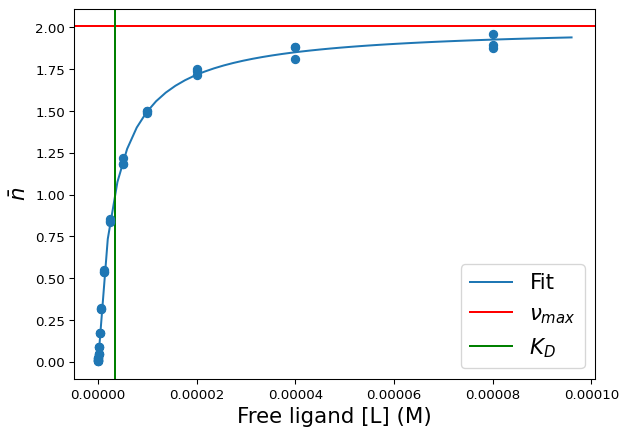

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot the fitted curve
ax.plot(L, nbar_calc, label='Fit')

# Straight lines indicating the parameters 
ax.axhline(n_fit, color='red', label=r'$\nu_{max}$')
ax.axvline(K_D_fit, color='green', label=r'$K_D$')

# Same as before
ax.plot(df['Free_ligand_(M)'], df['n_bar'], 'o', color='C0')
ax.set_xlabel('Free ligand [L] (M)', fontsize=16)
ax.set_ylabel(r'$\bar{n}$', fontsize=16)
ax.legend(fontsize=16)
plt.show()

------------------------------------------------------------------------

## Interpretation of binding data.

In [45]:
import numpy as np

The `inter-bindin-data.xlsx` contains a protein binding dataset.

#### (a) Load the dataset

Load the dataset using the widget below

In [46]:
import numpy as np
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [47]:
df = uploader.get_dataframe()
display(df)

In [48]:
from IPython.display import display 
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('interpret_week48') # Load from package for the solution so it doesn't require to interact.
display(df)

#### (b) SI Units

Add a new column to the `DataFrame` with the ligand concentration in SI
units.

In [50]:
df['[L]_(M)'] = df["[L]_(uM)"] * 10**(-6)
display(df)

#### (c) Plot the data

Make plots of the binding data directly with a linear and logarithmic
x-axis.

Estimate $K_D$ by visual inspection of these plots!

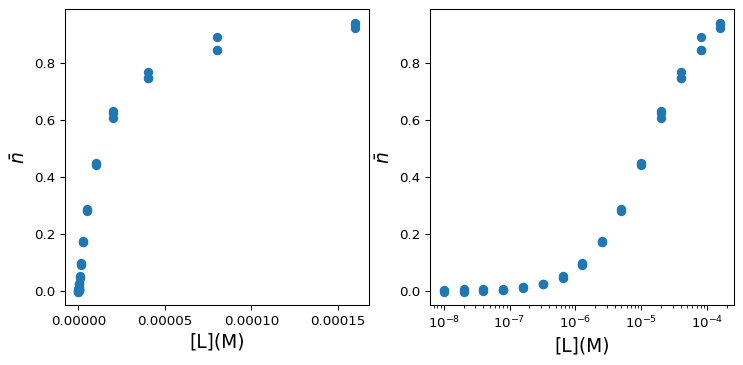

In [52]:
import matplotlib.pyplot as plt

# This makes a figure with two axes.
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Can with [0] to plot in the first axis.
ax = axes[0]
ax.plot(df['[L]_(M)'], df['nbar'], 'o') # Replace ... with your code.
ax.set_xlabel('[L](M)', fontsize=14)
ax.set_ylabel(r'$\bar{n}$', fontsize=14)

ax = axes[1]
ax.plot(df['[L]_(M)'], df['nbar'], 'o')
ax.set_xlabel('[L](M)', fontsize=14)
ax.set_ylabel(r'$\bar{n}$', fontsize=14)
ax.set_xscale('log')

> **Note**
>
> Ths command `ax.set_xscale('log')` tells `matplotlib` that we want the
> x-axis to use a log-scale.

In [54]:
K_D_estimate = 5 * 10**(-5)

#### (d) Make a fit

Make a fit to determine $K_D$, as always we start by implementing the
function to fit with

In [56]:
def n_bar(L, K_D):
    return L / (L + K_D)

And then we can make the fit

In [58]:
from scipy.optimize import curve_fit

# Choose the variables from the dataframe
x = df['[L]_(M)']
y = df['nbar']

# Initial guess
p0 = [K_D_estimate]

# Bounds
bounds = (0, np.inf) # We limit the parameters to be positve.

# Curve fit
popt, pcov = curve_fit(n_bar, x, y, p0=p0, bounds=bounds)

# Print the parameters
K_D_fit = popt[0]
print(f"{K_D_fit = :e}")

K_D_fit = 1.245798e-05

#### (e) Compare

Make a plot to compare the fit with your estimate. Start by evaluating
the function

In [60]:
# Evaluate on the fit so we can plot it.
L_smooth = np.linspace(0, df['[L]_(M)'].max(), 100)
nbar_fit = n_bar(L_smooth, K_D_fit)

# We will also evaluate where the points are sampled on a log-scale.
# The `geomspace` function makes points uniformly spaced on a logaritmic axis.
L_smooth_log = np.geomspace(df['[L]_(M)'].min(), df['[L]_(M)'].max(), 100)
nbar_fit_log = n_bar(L_smooth_log, K_D_fit)

Now finish the code below to make the plot.

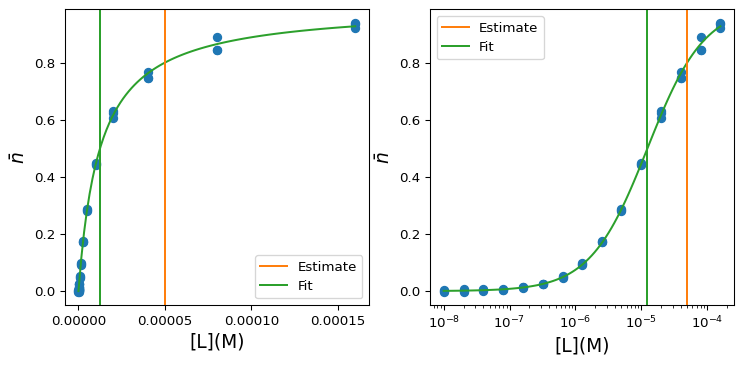

In [62]:
# This makes a figure with two axes.
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Index with [0] to plot in the first axis - Linear plot
ax = axes[0]
ax.plot(df['[L]_(M)'], df['nbar'], 'o', color='C0')
ax.plot(L_smooth, nbar_fit, color='C2')

ax.axvline(K_D_estimate, label='Estimate', color='C1')
ax.axvline(K_D_fit, label='Fit', color='C2')
ax.set_xlabel('[L](M)', fontsize=14)
ax.set_ylabel(r'$\bar{n}$', fontsize=14)
ax.legend()

# Index with [1] to plot in the second axis - Log plot.
ax = axes[1]
ax.plot(df['[L]_(M)'], df['nbar'], 'o', color='C0')
ax.plot(L_smooth_log, nbar_fit_log, color='C2')

ax.set_xlabel('[L](M)', fontsize=14)
ax.set_ylabel(r'$\bar{n}$', fontsize=14)
ax.axvline(K_D_estimate, label='Estimate', color='C1')
ax.axvline(K_D_fit, label='Fit', color='C2')
ax.legend()
ax.set_xscale('log')

#### (f) Saturation

Based on the value of $K_D$ found from the fit,

-   At which concentration do you expect 10% saturation?
-   At which concentration do you expect 90% saturation?

------------------------------------------------------------------------

## ADP binding to pyruvate kinase.

In [63]:
import matplotlib.pyplot as plt
import numpy as np

Based on the literature, you suspect that the binding of ADP to the
enzyme pyruvate kinase might be coopera-tive and decide to investigate
this by measuring the binding to the enzyme using radioactive ATP. The
enzyme concentration was 4 μM throughout the titration, and each
measurement was done in triplicate. The binding results were obtained at
310 K and are given in the `.csv`-file `adp-bindin-pyruva-kinase.csv`.

#### (a) Load the dataset

As always, use the widget to load the dataset

In [64]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [65]:
df = uploader.get_dataframe()
display(df)

In [66]:
import pandas as pd
pd.set_option('display.max_rows', 6)
from IPython.display import display 
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('adp_pyruvate') # Load from package for the solution so it doesn't require to interact.
display(df)

30 rows × 2 columns

#### (b) Units

The concentrations in the dataset are given in mM, add a new column to
the `DataFrame` with the units given in M.

In [68]:
df['[ADPtot](M)'] = df['[ADPtot](mM)'] * 10**(-3)
display(df)

30 rows × 3 columns

#### (c) Free ADP concentration

For each value of $\bar{n}$ calculate the concentration of
\[ADP$_\text{free}$\] from \[ADP$_\text{tot}$\] and \[enzyme\].

In [70]:
enzyme_conc = 4 * 10**(-6)
df['[ADPfree](M)'] = df['[ADPtot](M)'] - df['nbar'] * enzyme_conc
display(df)

30 rows × 4 columns

#### (d) Make a plot

Make a plot of the free ligand concentration versus $\bar{n}$.

Text(0, 0.5, '$\\bar{n}$')

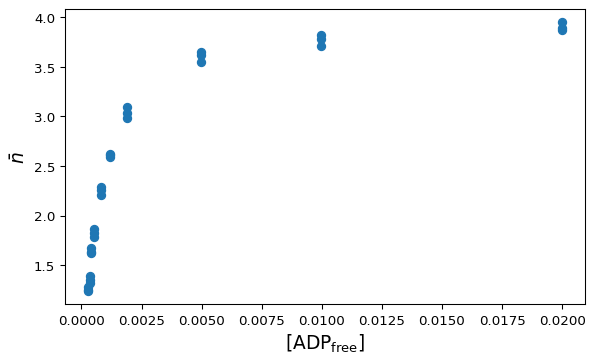

In [72]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(df['[ADPfree](M)'], df['nbar'], marker='o', linestyle='none', label='Observations')
ax.set_xlabel(r'$[\text{ADP}_{\text{free}}]$', fontsize=14)
ax.set_ylabel(r'$\bar{n}$', fontsize=14)

#### (f) Preparing for fitting

To fit we need a implement the function we want to fit the parameters
of, the functional form is

$$
n = n_{\text{max}} \frac{[L]^h}{K_D + [L]^h}
$$

In [74]:
def n_bound(L, n_max, K_D, h):
    return n_max * L**h / (K_D + L**h)

print(f"{n_bound(1, 1, 1, 1) = }") # Should give 1/2
print(f"{n_bound(21, 47, 2.5, 1) = }") # Should give 42
print(f"{n_bound(21, 47, 2.5, 2) = }") # Should give 46.73..

n_bound(1, 1, 1, 1) = 0.5
n_bound(21, 47, 2.5, 1) = 42.0
n_bound(21, 47, 2.5, 2) = 46.73506200676437

#### (e) Fitting

Finish the code below to create a fit.

In [76]:
from scipy.optimize import curve_fit

# Choose the variables from the dataframe
x = df['[ADPfree](M)']
y = df['nbar']

# Initial guess
K_D_guess = 1*10**(-3) # Your initial guess for K_D 
n_max_guess = 1 # Your initial guess for nu_max
h_guess = 2 # Your initial guess for the exponent.
p0 = [K_D_guess, n_max_guess, h_guess]

# Bounds
bounds = (0, np.inf) # We limit the parameters to be positve.

# Curve fit
popt, pcov = curve_fit(n_bound, x, y, p0=p0, bounds=bounds)

# Print the parameters
n_max_fit, K_D_fit, h_fit = popt
print(f"{n_max_fit = :1.3f} ")
print(f"{K_D_fit = :e}")
print(f"{h_fit = :1.3f} ")

n_max_fit = 4.018 
K_D_fit = 5.450524e-04
h_fit = 1.021 

Once we’ve obtained the fitted parameters we can plot the fit together
with the data.

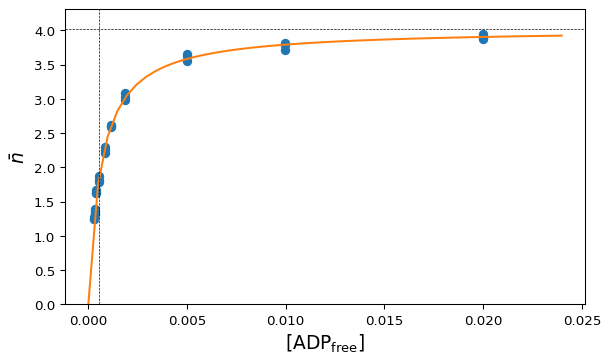

In [78]:
L = np.linspace(0, 1.2 * x.max(), 50)
n = n_bound(L, n_max_fit, K_D_fit, h_fit)

fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(df['[ADPfree](M)'], df['nbar'], 'o', label='Observations')
ax.plot(L, n)
ax.axvline(K_D_fit, color='k', linewidth=0.5, linestyle='--')
ax.axhline(n_max_fit, color='k', linewidth=0.5, linestyle='--')


ax.set_xlabel(r'$[\text{ADP}_{\text{free}}]$', fontsize=14)
ax.set_ylabel(r'$\bar{n}$', fontsize=14)
ax.set_ylim([0, n.max()*1.1])

**Question**: Is the binding cooperative?

#### (f) Free energy

Calculate the free energy for the association of the ADP-pyruvate kinase
complex assuming
$R = 8.314472 \times 10^{-3} \ \frac{\text{kJ}}{\text{mol} \cdot \text{K}}$
and $T = 310 \ \text{K}$.

> **Tip**
>
> Consider the difference between association and dissociation

Start by defining the two given constants as variables

In [80]:
R = 8.314472 * 10**(-3)
T = 310

And do the calculation

In [81]:
delta_G = ...
print(f"{delta_G = :.3f} kJ/mol")

In [82]:
delta_G = R * T * np.log(K_D_fit)
print(f"{delta_G = :.3f} kJ/mol")

delta_G = -19.369 kJ/mol

------------------------------------------------------------------------

## Determination of type and strength of cooperativity

In [83]:
import matplotlib.pyplot as plt
import numpy as np

The binding of NAD+ to the protein yeast glyceraldehyde 3-phosphate
dehydrogenase (GAPDH) was studied using equilibrium dialysis. The enzyme
concentration was 71 μM. The concentration of
$[\text{NAD}^{+}_\text{free}]$ and the corresponding values of $\bar{n}$
were determined with the resulting data found in the dataset
`deter-type-streng-coope.xlsx`.

The dataset consists of three independent repititions of the same
experiment.

#### (a) Load the dataset

Load the dataset using the widget below

In [84]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [85]:
df = uploader.get_dataframe()
display(df)

In [86]:
from IPython.display import display 
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('determination_coop_week48') # Load from package for the solution so it doesn't require to interact.
display(df)

9 rows × 4 columns

#### (b) Averaging and units.

Start by adding a new column to the `DataFrame` with the average value
of $\bar{n}$ across the three series

> **Tip**
>
> Remember that you can set a new column based on a computation using
> one or more other columns, e.g. 
>
> ``` python
> df['new_col'] = df['col1'] + df['col2']
> ```

In [88]:
df['nbar_avg'] = (df['nbar1'] + df['nbar2'] + df['nbar3']) / 3

Now also add a column with the ligand concentration in SI units with the
column-name `[NAD+free]_(M)`.

In [90]:
df['[NAD+free]_(M)'] = df['[NAD+free]_(uM)'] * 10**(-6)
display(df)

9 rows × 6 columns

Finally, set the concentration of the GADPH in SI units

In [91]:
 c_gadph = 71 * 10**(-6)

#### (c) Plot

Make a plot of the average $\bar{n}$ as a function of
$[\text{NAD}^{+}_\text{free}]$.

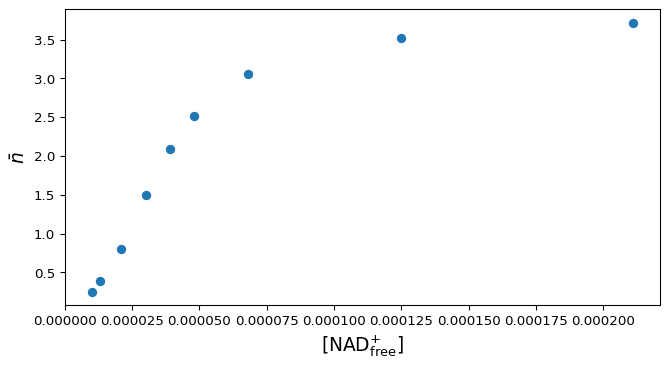

In [93]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(df['[NAD+free]_(M)'], df['nbar_avg'], 'o')
ax.set_xlabel(r'$[\text{NAD}^{+}_\text{free}]$', fontsize=14)
ax.set_ylabel(r'$\bar{n}$', fontsize=14)
plt.show()

#### (d) Scatchard plot

Make a Scatchard plot based on the average $\bar{n}$.

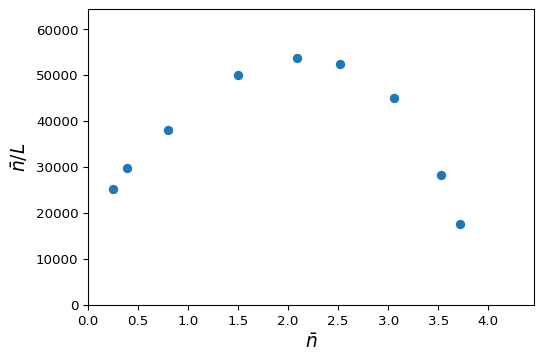

In [95]:
# Calculate nbar / L 
nbar_over_L = df['nbar_avg'] / df['[NAD+free]_(M)']

fig, ax = plt.subplots(figsize=(6, 4)) 
ax.plot(df['nbar_avg'], nbar_over_L, 'o')
ax.set_xlabel(r'$\bar{n}$', fontsize=14)
ax.set_ylabel(r'$\bar{n}/L$', fontsize=14)
ax.set_xlim([0, df['nbar_avg'].max()*1.2])
ax.set_ylim([0, nbar_over_L.max() * 1.2])

#### (e) Binding sites

Estimate by eye how many bindings sites GAPDH contains for
$\text{NAD}^{+}$?

#### (f) Cooperativity

Based on a visual inspection of the plot above, are there in signs of
cooperativity? If so, which kind?

#### (g) Fit

> **Note**
>
> The function `np.concatenate` takes a number of arrays and makes a new
> array that consisting of the originals one after each other. For
> example,
>
> ``` python
> A = np.array([1, 2, 3])
> B = np.array([4, 5, 6])
> C = np.concatenate([A, B])
> print(C)
> ```
>
>     [1 2 3 4 5 6]

Make a fit using the functional form

$$
\bar{n} = N \frac{[L]^h}{K_D + [L]^h}
$$

As usual, start by defining the function in Python

In [97]:
def n_bar(L, N, k_d, h):
    return N * L**h / (k_d + L**h)

Now we can fit

In [100]:
from scipy.optimize import curve_fit

# Choose the variables from the dataframe
x = np.concatenate([df['[NAD+free]_(M)'], df['[NAD+free]_(M)'], df['[NAD+free]_(M)']])
y = np.concatenate([df['nbar1'], df['nbar2'], df['nbar3']])

# Initial guess
p0 = [4, 1*10**(-4), 1]

# Bounds
bounds = (0, np.inf) # We limit the parameters to be positve.

# Curve fit
popt, pcov = curve_fit(n_bar, x, y, p0=p0, bounds=bounds)

# Print the parameters
N_fit, k_d_fit, h_fit = popt
print(f"{N_fit = :.3f}")
print(f"{k_d_fit = :e}")
print(f"{h_fit = :.3f}")

N_fit = 4.048
k_d_fit = 1.278350e-08
h_fit = 1.791

Do the fitted parameters support your intuitive reading of the type of
kooperativity

> **Note**
>
> In the data sets used, repeated experiments were given as a three
> seperate columns, which is a quite natural way of recording data
> during an experiment. However, it is not an appropriate format for
> regression, where we want all the data-points in a single column. In
> this exercise we did a bit of *data wrangling* to make the data
> appropriate for what we want to do with it - in this case by creating
> a new joint column containing all the data by using the
> `np.concatenate` function.

------------------------------------------------------------------------

## Competition in ligand binding

Below is given the general expression for saturation of a binding site
by one of the ligands, $L$, when two ligands $L$ and $C$ are competing
for binding to the same site on a protein. Assume that $[P_T] = 10^{-9}$
$\mathrm{M}$.

$$
\theta_L = \frac{[PL]}{[P_T]} = \frac{1}{\frac{K_D}{[L]}\left(1 + \frac{[C]}{K_C}\right) + 1}
$$

Consider these four situations

| \# | $K_D$ | $[L_T]$ | $K_C$ | $[C_T]$ |
|------|-----------------|-----------------|-----------------|-----------------|
| 1 | $1·10^{-5}$ $\mathrm{M}$ | $1·10^{-3}$ $\mathrm{M}$ | $1·10^{-6}$ $\mathrm{M}$ | $0$ |
| 2 | $1·10^{-5}$ $\mathrm{M}$ | $1·10^{-3}$ $\mathrm{M}$ | $1·10^{-6}$ $\mathrm{M}$ | $1·10^{-2}$ $\mathrm{M}$ |
| 3 | $1·10^{-5}$ $\mathrm{M}$ | $1·10^{-3}$ $\mathrm{M}$ | $1·10^{-5}$ $\mathrm{M}$ | $1·10^{-3}$ $\mathrm{M}$ |
| 4 | $1·10^{-5}$ $\mathrm{M}$ | $1·10^{-5}$ $\mathrm{M}$ | $1·10^{-6}$ $\mathrm{M}$ | $1·10^{-6}$ $\mathrm{M}$ |

##### (a) Explain simplification

Explain how the fact that $[P_T]$ is much smaller than $[L_T]$ and
$[C_T]$ simplifies the calculations using the above equation.

#### (b) Ligand degree of saturation

Calculate the degree of saturation of the protein with ligand $L$ in the
four situations.

Start by writing a Python function that calculates the degree of
saturation $\theta$.

In [102]:
def bound_fraction(L, C, Kd, Kc):
    return 1 / ((Kd / L)*(1+(C/Kc))+1)

Then use that function to calculate $\theta_L$ for each situation.

In [104]:
theta_L_1 = bound_fraction(10**(-3), 0, 10**(-5), 10**(-18))
theta_L_2 = bound_fraction(10**(-3), 10**(-2), 10**(-5), 10**(-6))
theta_L_3 = bound_fraction(10**(-3), 10**(-3), 10**(-5), 10**(-5))
theta_L_4 = bound_fraction(10**(-5), 10**(-6), 10**(-5), 10**(-6))
print(f"{theta_L_1 = :.3f}")
print(f"{theta_L_2 = :.3f}")
print(f"{theta_L_3 = :.3f}")
print(f"{theta_L_4 = :.3f}")

theta_L_1 = 0.990
theta_L_2 = 0.010
theta_L_3 = 0.498
theta_L_4 = 0.333

#### (c) Competitor degree of saturation

What is the degree of saturation with respect to the competitor $C$ in
#1, #2, #3 and #4?

In [106]:
theta_C_1 = 0 # [C] = 0
theta_C_2 = bound_fraction(10**(-2), 10**(-3), 10**(-6), 10**(-5))
theta_C_3 = bound_fraction(10**(-3), 10**(-3), 10**(-5), 10**(-5))
theta_C_4 = bound_fraction(10**(-6), 10**(-5), 10**(-6), 10**(-5))

print(f"{theta_C_1 = :.3f}")
print(f"{theta_C_2 = :.3f}")
print(f"{theta_C_3 = :.3f}")
print(f"{theta_C_4 = :.3f}")

theta_C_1 = 0.000
theta_C_2 = 0.990
theta_C_3 = 0.498
theta_C_4 = 0.333

#### (d) Fraction of $[P_{\mathrm{free}}]$

What is the fraction of $[P_{\mathrm{free}}]$ in #1, #2, #3 and #4?

> **Tip**
>
> Consider how to express the fraction of $[P_{\mathrm{free}}]$ in terms
> of `theta_L_X` and `theta_C_X`.

In [108]:
theta_free_1 = 1 - (theta_L_1 + theta_C_1)
theta_free_2 = 1 - (theta_L_2 + theta_C_2)
theta_free_3 = 1 - (theta_L_3 + theta_C_3)
theta_free_4 = 1 - (theta_L_4 + theta_C_4)

print(f"{theta_free_1 = :.3f}")
print(f"{theta_free_2 = :.3f}")
print(f"{theta_free_3 = :.3f}")
print(f"{theta_free_4 = :.3f}")

theta_free_1 = 0.010
theta_free_2 = 0.000
theta_free_3 = 0.005
theta_free_4 = 0.333

#### (e) Qualitative analysis

Describe in your own words why these four competitive situations end up
with their respective binding patterns. Consider the relative
concentrations and affinities of ligands L and C.

------------------------------------------------------------------------

## Difference between $Q$ and $K_{eq}$

In [109]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 6)

Consider the reaction:

$$
A \rightleftarrows B
$$

The time course of the reaction was followed monitoring formation of the
product $B$. The starting concentration of $A$ was 50 µM, and as you
will learn later in the course, the reversible reaction going from $A$
to $B$ follows first order kinetics.

#### (a) Load & convert

The data is contained in the `diff_q_keq_data.xlsx` file.

In [110]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [111]:
df = uploader.get_dataframe()
display(df)

In [112]:
from IPython.display import display 
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('diff_q_keq') # Load from package for the solution so it doesn't require to interact.
display(df)

36 rows × 2 columns

Convert the measured concentrations of $B$, $[B]$, to concentrations in
the SI-unit $\mathrm{M} \ (\mathrm{mol/L})$. Repeat for the starting
concentration of $A$, $[A]_0$.

In [114]:
df['[B]_(M)'] = df['[B]_(uM)'] * 10**(-6)
A0 = 50 * 10**(-6)

#### (b) Law of mass balance

Use the laws of mass balance to calculate $[A]$ as a function of time in
the unit $\mathrm{M}$, add it as a column to the `DataFrame`

In [116]:
df['[A]_(M)'] = A0 - df['[B]_(M)']

#### (c) Mass action ratio

Calculate and plot the mass action ratio $Q$ as a function of time.

Text(0, 0.5, 'Mass action ratio $Q$')

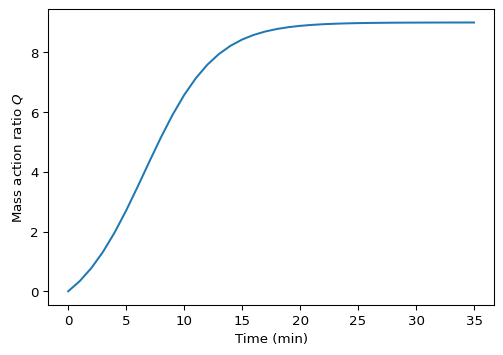

In [119]:
Q = df['[B]_(M)'] / df['[A]_(M)']

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(df['Time_(min)'], Q)
ax.set_xlabel('Time (min)')
ax.set_ylabel('Mass action ratio $Q$')

#### (d) $Q$ vs $K_{eq}$

What is the difference between $Q$ and $K_{eq}$?

#### (e) Favoured compound

Which of the two compounds $A$ and $B$ is favored at equilibrium?
(Favored: highest concentration)

#### (f) Equilibrium constant

What is the equilibrium constant of this reaction?

#### (g) Reequilibriate

Assume that an additional $10 \times 10^{-6} \mathrm{M}$ $A$ is added at
timepoint, $t=35$ min. What is the concentrations of $A$ and $B$ when
equilibrium has been reached again say at $t > 70$ min?

 

------------------------------------------------------------------------

## Determination of ΔH° for a reaction from the van’t Hoff plot.

In [120]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

The equilibrium constant for a reversible reaction going from $A$ to $B$
was measured as a function of temperature.

The data obtained is given in the Excel document
`deter_delta_h_data.xlsx` - load the data with the widget

In [121]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [122]:
df = uploader.get_dataframe()
display(df)

In [123]:
from IPython.display import display 
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('deter_delta_h') # Load from package for the solution so it doesn't require to interact.
display(df)

#### (a) Transform & plot the data

> **Tip**
>
> In NumPy the `np.log` function calculates the natural logarithm that
> we often write as $\ln$ and `np.log10` calculates the base 10
> logarithm.

Add new columns to the `DataFrame` containing $\ln(K_{eq})$ and $1/T$
and make a plot with $1/T$ on the x-axis and $\ln(K_{eq})$ on the
y-axis.

In [125]:
df['1/T'] = 1/df['T_(K)']
df['ln_Keq'] = np.log(df['Keq'])

Now you can make the plot in the cell below

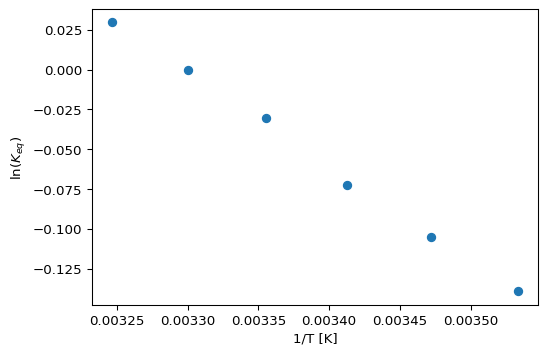

In [127]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(df['1/T'], df['ln_Keq'], 'o')
ax.set_xlabel(r'1/T [K]')
ax.set_ylabel(r'$\ln(K_{eq})$')
plt.show()

#### (b) Fit trendline

Make a linear trendline by fitting a linear function to the data.

Start by defining a linear function

In [129]:
def vant_hoff(T, a, b):
    return a * T + b

In [131]:
popt, pcov = curve_fit(vant_hoff, df['1/T'], df['ln_Keq'])
a, b = popt

print(f"{a:.3f}")
print(f"{b:.3f}")

-599.018
1.976

Then make a plot with the trendline added

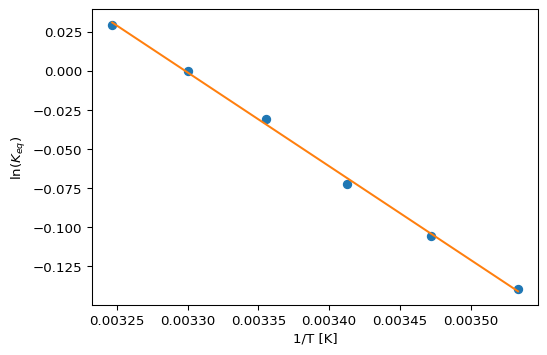

In [133]:
fig, ax = plt.subplots(figsize=(6, 4))
T_trend = np.array([df['1/T'].min(), df['1/T'].max()])

ax.plot(df['1/T'], df['ln_Keq'], 'o')
ax.plot(T_trend, vant_hoff(T_trend, a, b))

ax.set_xlabel('1/T [K]')
ax.set_ylabel(r'$\ln(K_{eq})$')
plt.show()

#### (c) Reaction type

Calculate the reaction enthalpy and entropy, at $T = 298 \ \mathrm{K}$,
assuming that
$R = 8.314472 \times 10^{-3} \ \frac{\mathrm{kJ}}{\mathrm{mol}\cdot\mathrm{K}}$.
Is the reaction endo- or exothermic?

In [134]:
# Define your known values:
R = 8.314472 * 10**(-3)
T = 298

dH = -R * a
dS = R * b

print(f"{dH = :.3f}")
print(f"{dS = :.3f}")

dH = 4.981
dS = 0.016

#### (d) Free energy change

Calculate the free energy change, $\Delta G^\circ$, at
$T = 298 \ \mathrm{K}$, assuming that
$R = 8.314472 \times 10^{-3} \ \frac{\mathrm{kJ}}{\mathrm{mol}\cdot\mathrm{K}}$

In [137]:
dG = dH - T * dS

print(f"{dH = :.3f}")
print(f"{dS = :.3f}")
print(f"{dG = :.3f}")

dH = 4.981
dS = 0.016
dG = 0.085

------------------------------------------------------------------------

## ATP hydrolysis

In [138]:
import numpy as np

Below is shown the structure of ATP.

$\Delta G^\circ$ for the hydrolysis of ATP to ADP and Pi is
$-30.5 \ \mathrm{kJ/mol}$.

![](https://raw.githubusercontent.com/au-mbg/fysisk-biokemi/refs/heads/main/course/lessons/figures/atp_structure.png)

#### (a) $\Delta G$

In cells at $298 \ \mathrm{K}$ the steady state concentrations of ATP,
ADP og Pi resulted in a value for the reaction quotient
$Q = \frac{\mathrm{[ADP]}[\mathrm{Pi}]}{[\mathrm{ATP}]} = 0.002$.
Calculate ΔG’ under these conditions.

In [140]:
# Known values:
Q = 0.002
T = 298 # K
dG_std = -30.5 # kJ / mol
R = 8.314 * 10**(-3) # kJ /(mol K)

# Calculation:
dG = dG_std + R*T*np.log(Q)
print(dG)

-45.89713901562406

#### (b) Equilibrium or not?

Assuming that the temperature within these cells is $298 \ \mathrm{K}$,
are these cells in equilibrium with respect to the hydrolysis of ATP?

#### (c) ATP synthesized

Calculate the number of moles of ATP synthesized by a resting person in
a period of 24 hours, assuming that the energy consumption by this
person is $8368 \ \mathrm{kJ}$ per 24 hours and that 40% of this energy
is converted directly into ATP without loss of energy. Use the ΔG’ value
calculated in question a, and assume that $298 \ \mathrm{K}$.

In [142]:
energy_atp = 0.4 * 8368 # kJ
synth_atp = energy_atp / np.absolute(dG)
print(synth_atp)

72.92829295657326

> **Tip**
>
> You can use `np.absolute` to calculate the absolute value of a number.

#### (d) Turnover

Next, calculate the average number of times each ATP molecule is turned
over (synthesis followed by hydrolysis) in 24 hours when the total
amount of ATP in the body equals $0.2 \ \mathrm{mol}$.

In [144]:
total_atp = 0.2 
turn_over = synth_atp / total_atp
print(turn_over)

364.64146478286625